<a href="https://colab.research.google.com/github/w4cha/analisis-alura-etl/blob/main/alura_etl_challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premisa
**Telecom X - Análisis de Evasión de Clientes**
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto **"Churn de Clientes"**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

##1. Extracción de datos

In [1]:
import pandas as pd
link_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(link_data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##2. Limpieza de datos

In [2]:
# looking at the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
# unpacking nested objecst in json
import requests
# reding the text content of the link with the data
data = requests.get(link_data).text


In [4]:
import json
# parsing the data to python object and
# nnormalizing with pandas
nm_df = pd.json_normalize(json.loads(data))
nm_df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
# checking the info again
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
# cheking the info we can see that some of the data
# in account.Charges.Total is not a nan since it did not get
# transformed to float64 like account.Charges.Monthly, but that also
# the value is non null
# filtering df for only numeric data
# other aproach is to_numeric where you can specify what to do
# when values are not numbers
num_df = nm_df[nm_df['account.Charges.Total'].str.match(r"\d+\.\d+")].copy(deep = True)
num_df.shape

(6924, 21)

In [7]:
# seting numeric filtered columns to int
num_df['account.Charges.Total'] = num_df['account.Charges.Total'].astype(float)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6924 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6924 non-null   object 
 1   Churn                      6924 non-null   object 
 2   customer.gender            6924 non-null   object 
 3   customer.SeniorCitizen     6924 non-null   int64  
 4   customer.Partner           6924 non-null   object 
 5   customer.Dependents        6924 non-null   object 
 6   customer.tenure            6924 non-null   int64  
 7   phone.PhoneService         6924 non-null   object 
 8   phone.MultipleLines        6924 non-null   object 
 9   internet.InternetService   6924 non-null   object 
 10  internet.OnlineSecurity    6924 non-null   object 
 11  internet.OnlineBackup      6924 non-null   object 
 12  internet.DeviceProtection  6924 non-null   object 
 13  internet.TechSupport       6924 non-null   object 
 1

In [8]:
# cheking values possibilities by column
for i in num_df.columns:
  print(f"{i}: {(a := num_df[i].unique())}, total: {len(a)}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'], total: 6924
Churn: ['No' 'Yes' ''], total: 3
customer.gender: ['Female' 'Male'], total: 2
customer.SeniorCitizen: [0 1], total: 2
customer.Partner: ['Yes' 'No'], total: 2
customer.Dependents: ['Yes' 'No'], total: 2
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12  2 27 25 29 14 64 39 40  6 30 70 57 58 16 32 33 10 21 61
 15 44 22 24 19 47 62 46 52  8 48 28 35 41 53 68 60 31 36 17 18 51 38 42], total: 72
phone.PhoneService: ['Yes' 'No'], total: 2
phone.MultipleLines: ['No' 'Yes' 'No phone service'], total: 3
internet.InternetService: ['DSL' 'Fiber optic' 'No'], total: 3
internet.OnlineSecurity: ['No' 'Yes' 'No internet service'], total: 3
internet.OnlineBackup: ['Yes' 'No' 'No internet service'], total: 3
internet.DeviceProtection: ['No' 'Yes' 'No internet service'], total: 3
internet.TechSupport: ['Yes' 'No' 'No internet service'], to

In [9]:
# filtering empty churn values
num_df_filter = num_df.query("Churn != ''").copy(deep=True)

In [10]:
# renaming columns for easier access
new_names = {val: val.split(".", maxsplit=1)[-1].replace(".", "") for val in num_df.columns[2:]}
num_df_filter.rename(columns=new_names, inplace=True)

In [11]:
num_df_filter.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [12]:
# seeting some binary columns to bool
# churn has 3 values so it is not going to be turned
# to bool
columns_bool = ["SeniorCitizen", "Partner", "Dependents",
                "PhoneService", "MultipleLines", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]
num_df_filter[columns_bool] = num_df_filter[columns_bool].map(lambda x: True if x in ("Yes", 1) else False)

In [13]:
# checking that the map did translate on a change type
num_df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6708 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6708 non-null   object 
 1   Churn             6708 non-null   object 
 2   gender            6708 non-null   object 
 3   SeniorCitizen     6708 non-null   bool   
 4   Partner           6708 non-null   bool   
 5   Dependents        6708 non-null   bool   
 6   tenure            6708 non-null   int64  
 7   PhoneService      6708 non-null   bool   
 8   MultipleLines     6708 non-null   bool   
 9   InternetService   6708 non-null   object 
 10  OnlineSecurity    6708 non-null   object 
 11  OnlineBackup      6708 non-null   bool   
 12  DeviceProtection  6708 non-null   bool   
 13  TechSupport       6708 non-null   bool   
 14  StreamingTV       6708 non-null   bool   
 15  StreamingMovies   6708 non-null   bool   
 16  Contract          6708 non-null   object 
 17  

In [14]:
# adding a ChargesDaily column
num_df_filter["ChargesDaily"] = num_df_filter['ChargesMonthly']//30

In [15]:
num_df_filter["ChargesDaily"]

,ChargesDaily
0,2.0
1,1.0
2,2.0
3,3.0
4,2.0
...,...
7262,1.0
7263,2.0
7264,1.0
7265,2.0


In [16]:
# filtering for Churn users
# and checking range values again
nochurned_df = num_df_filter.query("Churn == 'No'")
churned_df = num_df_filter.query("Churn == 'Yes'")

##3. Carga y analisis de datos

###3.0 Analisis rapido de los datos por columnas de interes

In [17]:
# quick description of some data values
for important in [col_name for col_name in
                  num_df_filter.columns if num_df_filter[col_name].dtype
                  in ["float64", "int64", "bool"]] + ["PaymentMethod"]:
  print(important)
  print()
  print("Not Churned")
  print(nochurned_df[important].describe())
  print()
  print("Churned")
  print(churned_df[important].describe())
  print()

SeniorCitizen

Not Churned
count      4917
unique        2
top       False
freq       4286
Name: SeniorCitizen, dtype: object

Churned
count      1791
unique        2
top       False
freq       1330
Name: SeniorCitizen, dtype: object

Partner

Not Churned
count     4917
unique       2
top       True
freq      2594
Name: Partner, dtype: object

Churned
count      1791
unique        2
top       False
freq       1158
Name: Partner, dtype: object

Dependents

Not Churned
count      4917
unique        2
top       False
freq       3229
Name: Dependents, dtype: object

Churned
count      1791
unique        2
top       False
freq       1482
Name: Dependents, dtype: object

tenure

Not Churned
count    4917.000000
mean       37.612162
std        24.104285
min         1.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

Churned
count    1791.000000
mean       17.957566
std        19.491422
min         1.000000
25%         2.00

###3.1 Distribucion del estado de los usuarios

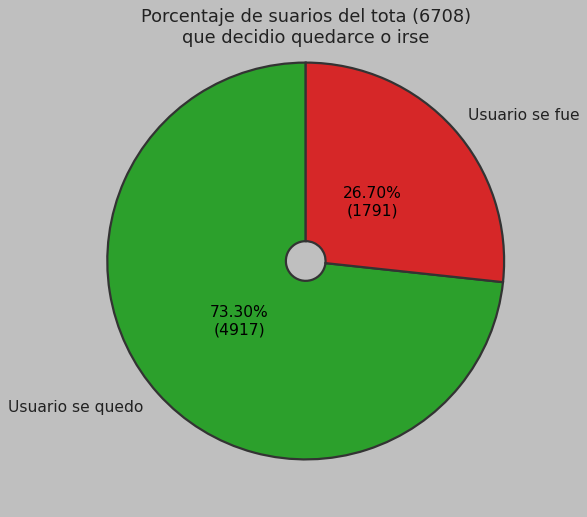

In [18]:
import plotly.express as exp
import matplotlib.pyplot as plt
import seaborn as sns
# visualización grafica de los datos entre usuarios
# que se quedaron y se fueron
values_count = num_df_filter.groupby(by="Churn").agg(**{"total_status": ("Churn", "count")})["total_status"]
with plt.style.context("classic"):
  fig_1, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
  # first is the wedge then the labels outside wedge and finally
  # the text inside the wedge
  _, text_label, text_percent = ax_1.pie(x=values_count, labels=["Usuario se quedo", "Usuario se fue"],
                                         colors=["#2ca02c", "#d62728"],
                                         autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100*len(num_df_filter))})",
                                         pctdistance=0.45, startangle=90,
           wedgeprops={"edgecolor": "#333333", "width": 0.9, "linewidth": "2"})
  for text_ in text_label:
    text_.set_color("#222222")
    text_.set_fontsize(14)
  for pct_ in text_percent:
    pct_.set_fontsize(14)
  plt.title(f"Porcentaje de suarios del tota ({len(num_df_filter)})\nque decidio quedarce o irse",
            fontsize=16, color="#222222", y=0.93)
  plt.show()

###3.2 Caracterización cualitativa de los tipos de usuario

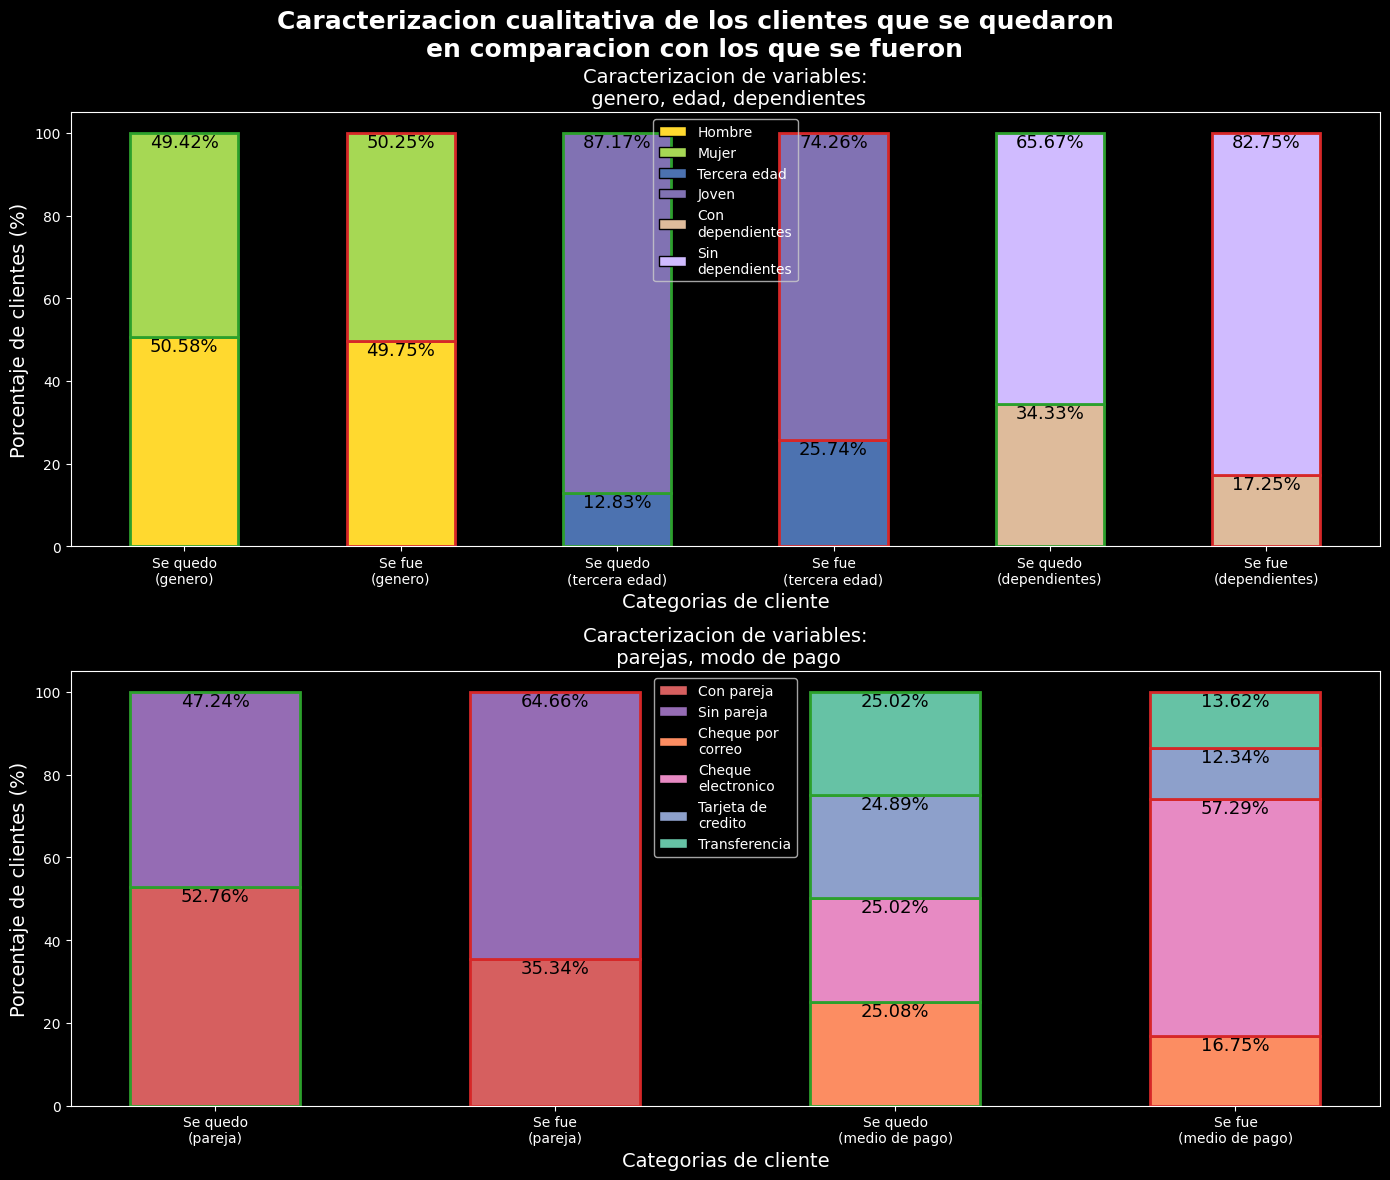

In [19]:

# caracterización cualitativa y cuantitativa de los dos subconjuntos (se fue, se quedo)
import numpy as np
from matplotlib.patches import Patch
plot_state = {"genero": {
  "categories": ["Se quedo\n(genero)", "Se fue\n(genero)"],
  "data": [num_df_filter.groupby(by=["gender", "Churn"]).agg(**{"total_status": ("Churn", "count")}).query(f"gender == '{val}'").sort_values(by="Churn")["total_status"] for val in ["Male", "Female"]],
  "percentage": [len(nochurned_df), len(churned_df)],
  "pallete": sns.color_palette("Set2", n_colors=6),
  "labels_bar": ["Hombre", "Mujer"],
  "data_color": [-1, 4],
  "bottom": np.zeros(2),
  "position": 0
},
 "edad": {
     "categories": ["Se quedo\n(tercera edad)", "Se fue\n(tercera edad)"],
     "data": [num_df_filter.groupby(by=["SeniorCitizen", "Churn"]).agg(**{"total_status": ("Churn", "count")}).query(f"SeniorCitizen == {val}").sort_values(by="Churn")["total_status"] for val in [True, False]],
     "percentage": [len(nochurned_df), len(churned_df)],
     "pallete": sns.color_palette("deep", n_colors=6),
     "labels_bar": ["Tercera edad", "Joven"],
     "data_color": [0, 4],
     "bottom": np.zeros(2),
     "position": 2
 },
  "dependientes": {
      "categories": ["Se quedo\n(dependientes)", "Se fue\n(dependientes)"],
     "data": [num_df_filter.groupby(by=["Dependents", "Churn"]).agg(**{"total_status": ("Churn", "count")}).query(f"Dependents == {val}").sort_values(by="Churn")["total_status"] for val in [True, False]],
     "percentage": np.array([len(nochurned_df), len(churned_df)]),
     "pallete": sns.color_palette("pastel", n_colors=6),
      "labels_bar": ["Con\ndependientes", "Sin\ndependientes"],
     "data_color": [5, 4],
     "bottom": np.zeros(2),
     "position": 4
  },
  "parejas": {
      "categories": ["Se quedo\n(pareja)", "Se fue\n(pareja)"],
     "data": [num_df_filter.groupby(by=["Partner", "Churn"]).agg(**{"total_status": ("Churn", "count")}).query(f"Partner == {val}").sort_values(by="Churn")["total_status"] for val in [True, False]],
     "percentage": np.array([len(nochurned_df), len(churned_df)]),
     "pallete": sns.color_palette("muted", n_colors=6),
      "labels_bar": ["Con pareja", "Sin pareja"],
     "data_color": [3, 4],
     "bottom": np.zeros(2),
     "position": 0
  },"modo de pago": {
      "categories": ["Se quedo\n(medio de pago)", "Se fue\n(medio de pago)"],
     "data": [num_df_filter.groupby(by=["PaymentMethod", "Churn"]).agg(**{"total_status": ("Churn", "count")}).query(f"PaymentMethod == '{val}'").sort_values(by="Churn")["total_status"] for val in ['Mailed check', 'Electronic check', 'Credit card (automatic)',
              'Bank transfer (automatic)']],
     "percentage": np.array([len(nochurned_df), len(churned_df)]),
     "pallete": sns.color_palette("Set2", n_colors=6),
      "labels_bar": ["Cheque por\ncorreo", "Cheque\nelectronico",
                     "Tarjeta de\ncredito", "Transferencia"],
     "data_color": [1, 3, 2, 0],
     "bottom": np.zeros(2),
     "position": 2
  },
}
with plt.style.context("dark_background"):
  fig_1, (ax_qtg) = plt.subplots(nrows=2, ncols=1, figsize=(14,12))
  for axis, sub_graph in zip(ax_qtg, ({key: plot_state[key] for key in list(plot_state.keys())[0:3]},
                                  {key: plot_state[key] for key in list(plot_state.keys())[3:]})):
    colors_legend_handler = []
    text_legends_handlesr = []
    for graph in sub_graph.values():
      graph["data_color"] = [graph["pallete"][val] for val in graph["data_color"]]
      bottom = graph["bottom"] # an arrray of zeros to set the current bottom
      for count, (label, label_data) in enumerate(zip(graph["data_color"], graph["data"])):
        percent_value = label_data/graph["percentage"]*100
        axis.bar(graph["categories"], percent_value, 0.5, bottom=bottom,
                  color=label,
                 edgecolor=["#2ca02c", "#d62728"], linewidth=2)
        colors_legend_handler.append(label)
        text_legends_handlesr.extend([graph["labels_bar"][count],])
        for count, (position, value) in enumerate(zip(bottom, percent_value), start=graph["position"]):
          axis.text(x=count, y=position+value, s=f"{value:.2f}%",
                    color="#000000",
                    fontsize=13, ha="center", va="top",)
        bottom = np.array([a + b for a, b in zip(bottom, percent_value)])
      # this manual way is the better aproach to give outlines to bars but
      # to keep that outline color from appearing in the legend color rectangles
      handlers = [Patch(facecolor=color, edgecolor='black', label=label) for color, label in zip(colors_legend_handler, text_legends_handlesr)]
      axis.set_xlabel("Categorias de cliente", fontsize=14)
      axis.set_ylabel("Porcentaje de clientes (%)", fontsize=14)
      axis.legend(handles=handlers, loc="upper center", facecolor="none")
      axis.set_title(label=f"Caracterizacion de variables:\n {', '.join(sub_graph.keys())}",
                     fontsize=14)
    plt.suptitle("Caracterizacion cualitativa de los clientes que se quedaron\nen comparacion con los que se fueron",
                 fontsize=18, fontweight="bold")
  fig_1.tight_layout()
  plt.show()

###3.3 Caracterización cuantitativa de los tipos de usuario

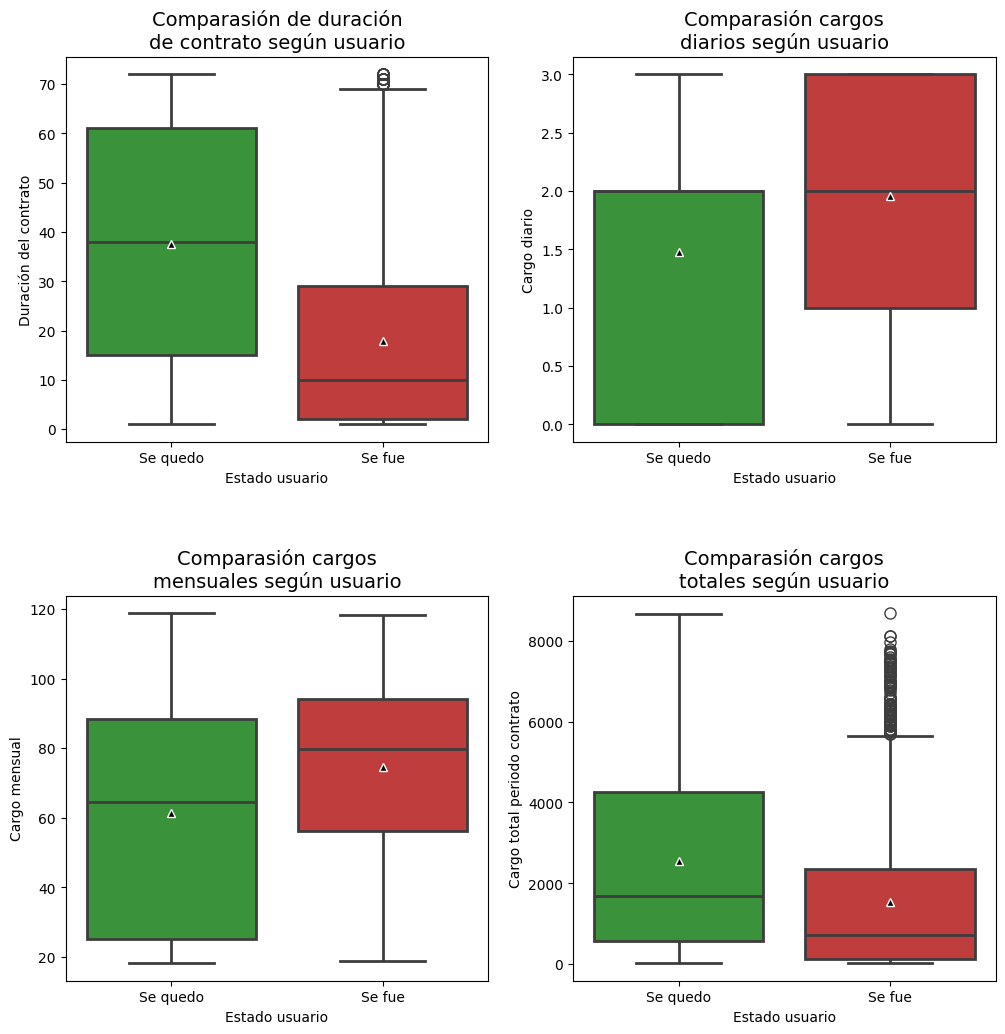

In [20]:
# cuantitative data
data_qtt = [{"data": pd.DataFrame({"Se quedo": nochurned_df['tenure'],
                                   "Se fue": churned_df['tenure']}),
             "title": dict(label="Comparasión de duración\nde contrato según usuario",
                           fontsize=14),
             "x_label": dict(xlabel="Estado usuario"),
             "y_label": dict(ylabel="Duración del contrato")},
            {"data": pd.DataFrame({"Se quedo": nochurned_df["ChargesDaily"],
                                   "Se fue": churned_df["ChargesDaily"]}),
             "title": dict(label="Comparasión cargos\ndiarios según usuario",
                           fontsize=14),
             "x_label": dict(xlabel="Estado usuario"),
             "y_label": dict(ylabel="Cargo diario")},
            {"data": pd.DataFrame({"Se quedo": nochurned_df["ChargesMonthly"],
                                   "Se fue": churned_df["ChargesMonthly"]}),
             "title": dict(label="Comparasión cargos\nmensuales según usuario",
                           fontsize=14),
             "x_label": dict(xlabel="Estado usuario"),
             "y_label": dict(ylabel="Cargo mensual")},
            {"data": pd.DataFrame({"Se quedo": nochurned_df["ChargesTotal"],
                                   "Se fue": churned_df["ChargesTotal"]}),
             "title": dict(label="Comparasión cargos\ntotales según usuario",
                           fontsize=14),
             "x_label": dict(xlabel="Estado usuario"),
             "y_label": dict(ylabel="Cargo total periodo contrato")}]
fig_2, ax_2 = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
for axis, state in zip(ax_2.flatten(), data_qtt):
  sns.boxplot(data=state["data"], ax=axis, palette=["#2ca02c", "#d62728"],
               linewidth=2, fliersize=8, showmeans=True,
              meanprops=dict(markeredgecolor="white", markerfacecolor="black"))
  axis.set_title(**state["title"])
  axis.set_xlabel(**state["x_label"])
  axis.set_ylabel(**state["y_label"])
plt.subplots_adjust(hspace=0.4)

##4. Extras

###4.1 Analisis correlación variables

In [21]:
# generating correlation matrix between the more
# prominent insights from the graphs in section 3
from functools import reduce

# Daily charge and churn status

churned_series = num_df_filter["Churn"].apply(lambda x: True if x == "Yes" else False)

cor_1 = num_df_filter["ChargesDaily"].corr(churned_series, min_periods=1)

# Total amount of sercices ("PhoneService", "MultipleLines", "OnlineBackup", "DeviceProtection",
# "TechSupport", "StreamingTV", "StreamingMovies") and churn
col_bool = ["PhoneService", "MultipleLines", "OnlineBackup", "DeviceProtection",
"TechSupport", "StreamingTV", "StreamingMovies"]
sum_series = [num_df_filter[val].astype(int) for val in col_bool]
sum_services = reduce(lambda x, y: x + y, sum_series)
cor_2 = sum_services.corr(churned_series, min_periods=1)

# Electronic check an churn
check_payment = num_df_filter["PaymentMethod"].apply(lambda x: 1 if x == "Electronic check" else 0)
cor_3 = check_payment.corr(churned_series, min_periods=1)
# Dependents
cor_4 = num_df_filter["Dependents"].astype(int).corr(churned_series, min_periods=1)
print("Correlaciones (0 sin correlación,\n> 0 and <= 1 con correlación positiva (si var_1 sube var_2 sube),\n>= -1 and < 0 correlación negativa (si var_1 sube var_2 baja)):\n")
print(*[f"Cobro diario (var_1) y estado (var_2): {cor_1}",
        f"Total servicios (var_1) y estado (var_2): {cor_2}",
        f"Pago cheque electronico (var_1) y estado (var_2): {cor_3}",
        f"Dependientes (var_1) y estado (var_2): {cor_4}",], sep="\n\n")

Correlaciones (0 sin correlación,
> 0 and <= 1 con correlación positiva (si var_1 sube var_2 sube),
>= -1 and < 0 correlación negativa (si var_1 sube var_2 baja)):

Cobro diario (var_1) y estado (var_2): 0.19545203233406377

Total servicios (var_1) y estado (var_2): -0.032863600123711555

Pago cheque electronico (var_1) y estado (var_2): 0.3021799209731186

Dependientes (var_1) y estado (var_2): -0.1652199485047798


###4.2 Graficando las correlaciones

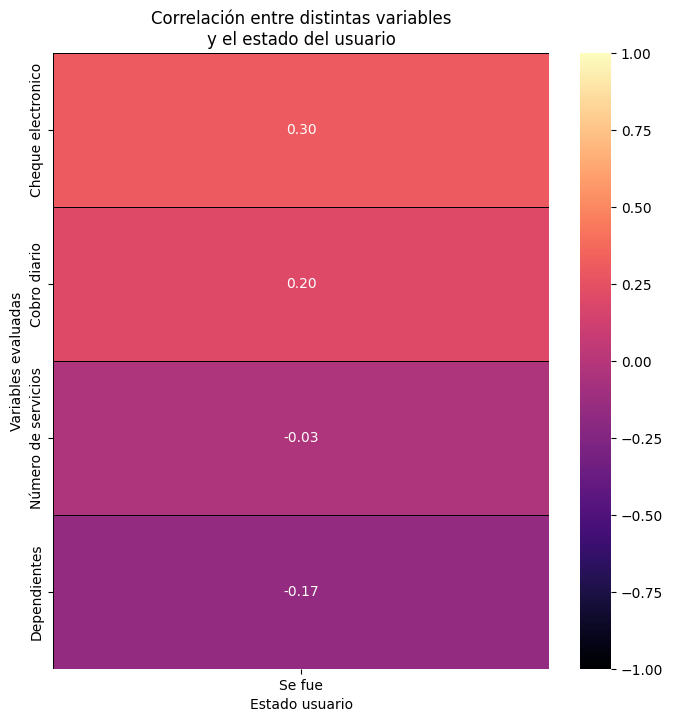

In [22]:
# creating heatmap
import seaborn as sns
corr_dict = {"Cheque electronico": cor_3,
             "Dependientes": cor_4,
             "Número de servicios": cor_2,
             "Cobro diario": cor_1,

}
corr_var = list(corr_dict.items())
corr_var.sort(key=lambda x: x[-1], reverse=True)
s_corr = np.array([[val[-1]] for val in corr_var])
fig_3, ax_cor = plt.subplots(figsize=(8,8))
sns.heatmap(s_corr, ax=ax_cor, xticklabels=["Se fue",],
            yticklabels=[val[0] for val in corr_var], annot=True,
            cmap="magma", fmt=".2f", linecolor="black", linewidths=.5,
            vmin=-1, vmax=1)
ax_cor.set_title("Correlación entre distintas variables\ny el estado del usuario")
ax_cor.set_ylabel("Variables evaluadas")
ax_cor.set_xlabel("Estado usuario")
plt.show()

# cuando se ocupa df.corr con una serie que es de valores booleanos
# la correlación cuando es positiva hace referencia a que cuando la variable
# aumenta de valor la variable booleana tiende a ser positiva y cuando la
# correlación es negativa si aumenta la variable de valor la booleana tendera
# a ser negativa (y visceversa)

# entre más positivo o negativo el valor de la correlación más fuerte
# es esa correlación entre ambas

# es lo mismo la correlación de var_a.corr(var_b) que var_b.corr(var_a)
# el sentido no influye en este caso


##5. Informe final

###Introducción:

Inicialmente se nos presento el caso de la compañía **Telecom x** en la cual han tenido una alta tasa de cancelación de servicios por parte de sus clientes. Por tal razon se pidió tratar de vislumbrar a partir de los datos entregados por la empresa cual son los posibles factores que pueden estar generando esta tendencia entre sus consumidores, para esto se decidió seguir la siguiente línea de trabajo:

### 1. Cargando los datos:
Como primer paso se decidió cargar los datos desde un link entregado por Telecom X desde para tener una primera impresión de como se ven estos.

### 2. Entendiendo y limpiando los datos:
Posteriormente se llevo a cabo varias series de limpieza de dato con el objetivo de que estos estuviesen en las mejores condiciones antes de ser analizados en mayor profundidad, para ello fue importante entender la estructura de dato y la función de cada columna.

### 3. Análisis de los datos:
Finalmente los datos en las distintas columnas fueron comparados unos con otros para si por entender si habían relaciones entre ellos esto a traves del uso de distintas métricas y la traficación de datos en dos grupos distintos uno con los usuarios que se fueron y otro con los que se quedaron.

---
###Una vez realizadas estas 3 fases de lo extraído se pudo llegar a los siguientes resultados:

I. Se obtuvo que del total de datos analizados el **26.70%** corresponde a usuarios que decidieron dejar de usar los servicios de Telecom X (grafico sección 3.1).

II. Se observo que las variables cualitativas que presentaban mayores diferencias entre ambos grupos de usuario eran las siguientes: Usuario es de la tercera edad (**25.74% se fue vs 12.83% se quedo, diferencia de 14.91%**), tenia dependientes (**17.25% se fue vs 34.33% se quedo, diferencia de -17.08%**), tenia pareja (**35.34% se fue vs 52.76% se quedo, diferencia de -17.42%**) y medio de pago era Cheque electrónico (**57.29% se fue vs 25.02% se quedo, diferencia de 32.27%**) (datos disponibles en grafico sección 3.2).

III. En cuanto a las variables Cuantitativas las mayores diferencias entre ambas muestras de usuarios se vieron en:
-En Cargos diarios realizados al usuario (valor diario promedio que pago el usuario por el servicio) se evidencio que **el valor del mismo para la muestra de usuarios que se fue estaba más concentrada en valores más altos que la de los usuarios que se quedaron** o en otras palabras **el cobro diario de los usuarios que se fueron fue mayor para un importante grupo del mismo comparado con los usuarios que se quedaron**.
- En cuanto a el cargo Mensual este no presento mayores diferencias entre ambos grupos de usuarios solo pudiéndose resaltar que **el valor mínimo mensual pagado por los usuarios que se fueron fue mayor que los usuarios que se quedaron** (segundo cuartil de los que se fueron se encuentra a nivel del tercer cuartil de os que se quedaron)
- El cobro total a diferencia de los diarios y mensuales **se concentro en valores más bajos en el grupo que se fue comparado con el que se quedo**, esto mismo también se observo en lo que es la duración de contrato. (análisis basado en boxplots de las variables en sección 3.3).

IV. De las correlaciones (causa probable) cuantificadas entre distintas variables se obtuvo:
- Que dentro de la escala de correlación (valores entre -1 y 1 donde valores positivos son correlación positiva osea que aumentos en la variable generan aumentos en la salida de usuarios y valores negativos son correlaciones negativas donde si una variable aumenta se genera una disminución en la salida de usuarios y viceversa) ninguna de las variables evaluadas (tiene dependientes, n° de servicios contratados, monto diario de cobro y si usa cheque electrónico)  **mostro una correlación positiva o negativa fuerte** (rango fue entre -0.17 y 0.3)
- Que el número de servicios tubo una **correlación nula (-0.03)** con si un cliente se iba o no.
- Que el hecho de si el cliente tiene o no dependientes **tubo una muy baja correlación negativa (-0.17)** con la estancia de los usuarios (si el número de dependientes baja es probable que afecte muy levemente el que un usuario se fuera).
- Que el cobro diario tiene **una baja correlación positiva (0.20)** con la decisión de un usuario de irse o no (si el cobro diario aumenta es probable que aumente algo el hecho de que el usuario decida irse).
- Que el usar cheque electrónico como medio de pago tubo **la correlación más alta (0.30)** lo que se traduce en que si el usuario decide pagar usando dicho medio se espera que **aumenta más significativamente la posibilidad de que el mismo decida abandonar**. (análisis basado en heatmap de la sección 4.1).

---
### Recomendación final
- Posible creación de planes más personalizados: Esto para abordar el hecho de que cierta porción de los usuarios que decidieron abandonar lo hicieron ya que los planes presentados por la empresa no son tan convenientes considerando su condición, enfocándose principalmente los esfuerzos en tratar de **acomodar los paquetes de servicio a personas de la tercera edad, sin dependientes o sin parejas**.
- **Poner una mayor atención al funcionamiento de las distintas opciones de pago**, centrándose principalmente en el cheque electrónico ya que es el método preferido de pago entre los usuarios que se fueron.
